# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [178]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
# Your code here
data = pd.read_csv('../data/boston_data.csv')
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [181]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


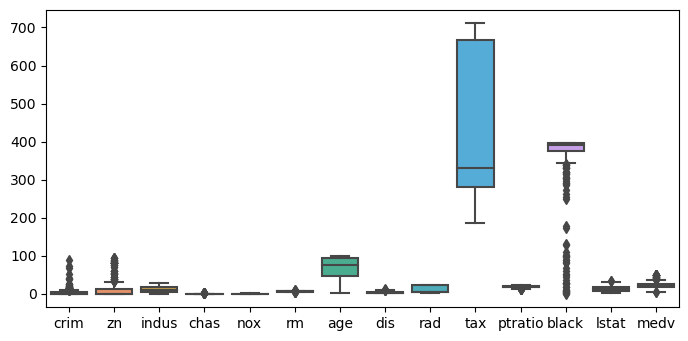

In [182]:
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.boxplot(data)
plt.tight_layout() 
plt.show()

In [183]:
Q1 = data['medv'].quantile(0.25)
Q3 = data['medv'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['medv'] < lower_bound) | (data['medv'] > upper_bound)]
print(outliers.shape)

(27, 14)


In [184]:
outliers.shape[0]/data.shape[0]
#Since the outliers constitute 6% of the entire dataset, I choose not to drop them.

0.06683168316831684

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

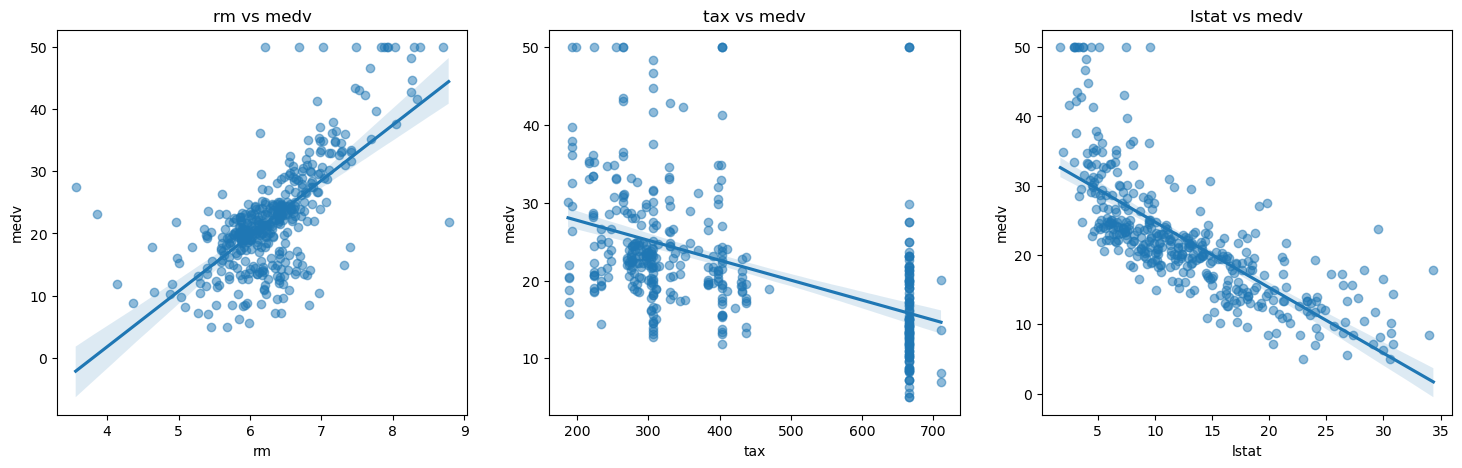

In [185]:
# Your plots here
selected_variables = ['rm', 'tax', 'lstat']

fig, axes = plt.subplots(nrows=1, ncols=len(selected_variables), figsize=(18, 5))

# Iterate over selected variables
for i, variable in enumerate(selected_variables):
    # Plot scatter plot with regression line
    sns.regplot(x=variable, y='medv', data=data, ax=axes[i], scatter_kws={'alpha':0.5})
    
    # Set labels and titles
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('medv')
    axes[i].set_title('{} vs medv'.format(variable))

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [186]:
# Your response here

''' As expected, there is a positive relationship between house prices and the number of rooms ('rm'), 
and a negative relationship between price and the percentage of lower-status population ('lstat'). 
However, I was also anticipating a positive correlation between price and tax, but I did not observe one.'''

" As expected, there is a positive relationship between house prices and the number of rooms ('rm'), \nand a negative relationship between price and the percentage of lower-status population ('lstat'). \nHowever, I was also anticipating a positive correlation between price and tax, but I did not observe one."

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

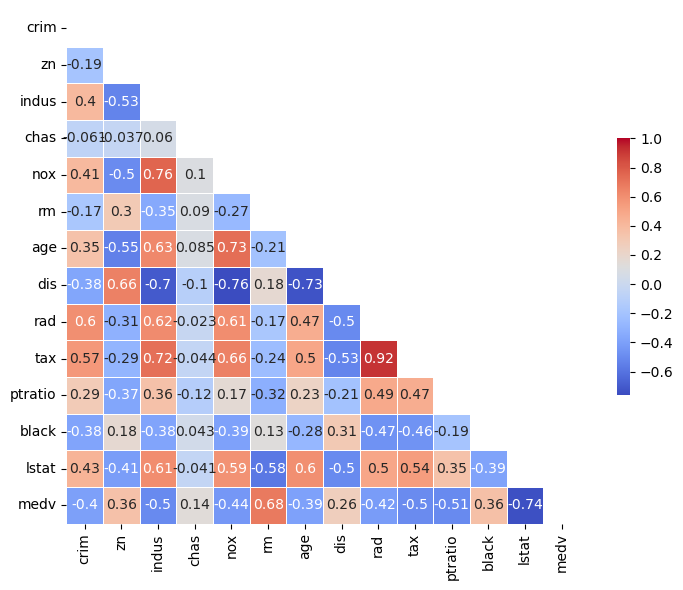

In [187]:
# Your response here

corr = data.select_dtypes(include=['int64', 'float64']).corr()
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = 'coolwarm'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#There are some high correlations between the variables like tax-rad, nox-indus, tax-indus, dis-indus, dis-nox, age-nox etc.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [188]:
# Your code here
data['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [189]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true,y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [190]:
# Your code here
from sklearn.model_selection import train_test_split

X = data.drop(columns='medv')
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1, shuffle=True)


In [191]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
# Five separate RFR here with the given max depths
max_depth = [2,4,6,8,10]
R2_test = {}
R2_train = {}

for i in max_depth:
    random_forest_model = RandomForestRegressor(max_depth=i)
    random_forest_model = random_forest_model.fit(X_train_transformed, y_train)
    y_train_predict = random_forest_model.predict(X_train_transformed)
    y_test_predict = random_forest_model.predict(X_test_transformed)
    print(f'R2_train for max_depth {i} is', r2_score (y_train_predict,y_train))
    print(f'R2_test for max_depth {i} is', r2_score (y_test,y_test_predict))
    
    R2_test[i] = r2_score(y_test,y_test_predict)
    R2_train[i] = r2_score(y_train_predict,y_train)

R2_train for max_depth 2 is 0.6210393290856391
R2_test for max_depth 2 is 0.7980170355492124
R2_train for max_depth 4 is 0.8908828096059184
R2_test for max_depth 4 is 0.8268329709952872
R2_train for max_depth 6 is 0.947138605359485
R2_test for max_depth 6 is 0.8484101359408366
R2_train for max_depth 8 is 0.962312016476331
R2_test for max_depth 8 is 0.8531319763990408
R2_train for max_depth 10 is 0.97057510820201
R2_test for max_depth 10 is 0.8384226999655758


Now, plot the score for each tree on the training set and on the testing set.

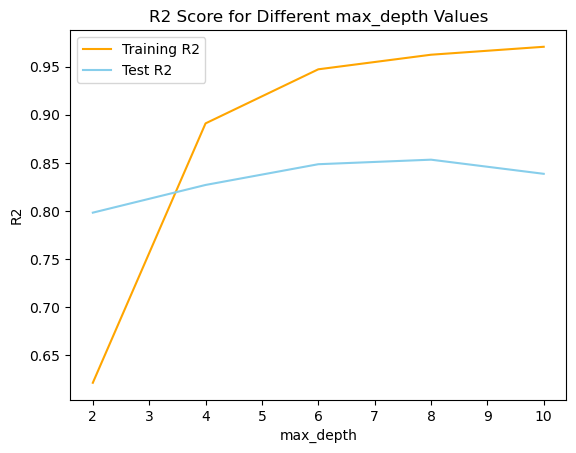

In [194]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(R2_train.keys(), R2_train.values(), color='orange', label='Training R2')
plt.plot(R2_test.keys(), R2_test.values(), color='skyblue', label='Test R2')
plt.ylabel("R2")
plt.xlabel("max_depth")
plt.title("R2 Score for Different max_depth Values")
plt.legend()
plt.show()


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [195]:
# Your response here

#Up to a max_depth of 8, the R2 score for the test set increased, and then it started to decrease as the model 
#reached overfitting

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [196]:
# Your response here
'''When the model is trained with a maximum depth of 1, it suffers from high bias. This is because the model is too 
simplistic and cannot capture the complexity of the underlying data, leading to underfitting.

Conversely, when the model is trained with a maximum depth of 10, it suffers from high variance. In this case, 
the model is too complex and captures noise in the training data, leading to overfitting.'''

'When the model is trained with a maximum depth of 1, it suffers from high bias. This is because the model is too \nsimplistic and cannot capture the complexity of the underlying data, leading to underfitting.\n\nConversely, when the model is trained with a maximum depth of 10, it suffers from high variance. In this case, \nthe model is too complex and captures noise in the training data, leading to overfitting.'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [200]:
# Your response here

random_forest_model = RandomForestRegressor(max_depth=8)
random_forest_model = random_forest_model.fit(X_train_transformed, y_train)
y_train_predict = random_forest_model.predict(X_train_transformed)
y_test_predict = random_forest_model.predict(X_test_transformed)
print(f'R2_train for max_depth is', r2_score (y_train_predict,y_train))
print(f'R2_test for max_depth is', r2_score (y_test,y_test_predict))

R2_train for max_depth is 0.9635096723284218
R2_test for max_depth is 0.8354030209648007


In [208]:
from sklearn.model_selection import cross_validate

random_forest_model = RandomForestRegressor(max_depth=8)
results = cross_validate(random_forest_model,X_train_transformed, y_train, cv = 10)

test_scores = results['test_score']

average_performance = np.mean(test_scores)

variance = np.var(test_scores)

print("Average Performance:", average_performance)
print("Variance of Test Scores:", variance)

Average Performance: 0.8247349878511809
Variance of Test Scores: 0.003997666777258646


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [199]:
# Your response here
#The model, trained on data from 1978, might not be suitable for use today in real-world scenarios. 
#The housing market has likely changed significantly since then, so the predictions may not accurately reflect current prices. 
#The dataset might not include all the factors that affect home prices.
#While the model could work well for predicting prices in urban areas like Boston, it may not generalize well to rural
#areas due to differences in housing markets. 